In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_train.shape

(55000, 28, 28)

In [3]:
#nomralization
import numpy as np

In [4]:
np.max(X_train),np.min(X_train)

(255, 0)

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [6]:
np.max(X_train),np.min(X_train)

(1.0, 0.0)

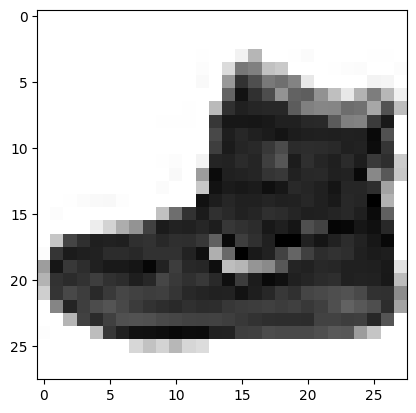

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

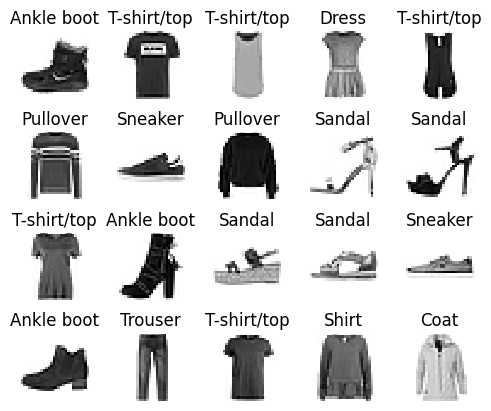

In [9]:
n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

model = Sequential()
model.add(InputLayer(input_shape=[28,28]))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 6ms/step - loss: 0.7966 - accuracy: 0.7360 - val_loss: 0.5505 - val_accuracy: 0.8084
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5123 - accuracy: 0.8216 - val_loss: 0.4729 - val_accuracy: 0.8344
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4620 - accuracy: 0.8383 - val_loss: 0.4447 - val_accuracy: 0.8408
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4327 - accuracy: 0.8467 - val_loss: 0.4195 - val_accuracy: 0.8482
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4118 - accuracy: 0.8549 - val_loss: 0.4090 - val_accuracy: 0.8560
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3964 - accuracy: 0.8600 - val_loss: 0.3901 - val_accuracy: 0.8580
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3824 - accuracy: 0.8646 - val_loss: 0.3756 - val_accurac